In [9]:
from CellularAutomaton import *
from IPython.display import display

%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

In [8]:
rows = 3
columns = 3
grid=[[cell() for x in range(columns)] for y in range(rows)]
gridvalues=[[grid[y][x].value for x in range(columns)] for y in range(rows)]

In [10]:
x=np.linspace(0,10)
y=no
plt.figure()
plt.plot()

NameError: name 'figure' is not defined

C:\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


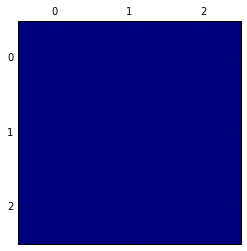

In [6]:
MyFigure, MyAxes = plt.subplots()
MyAxes.matshow(gridvalues)
MyFigure.show()

In [4]:
print(grid[0][0])

1


C:\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


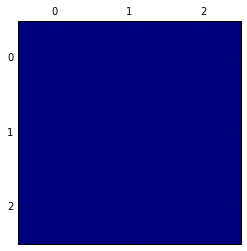

In [5]:
SetNeighbors(grid, columns, rows)
gridvalues=[[grid[y][x].value for x in range(columns)] for y in range(rows)]
MyFigure, MyAxes = plt.subplots()
MyAxes.matshow(gridvalues)
MyFigure.show()

In [6]:
print(grid[0][0])

1


C:\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


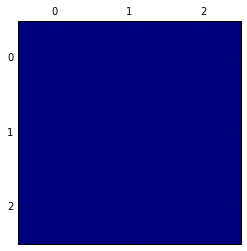

In [7]:
for row in grid:
    for c in row:
        c.update()
gridvalues=[[grid[y][x].value for x in range(columns)] for y in range(rows)]
MyFigure, MyAxes = plt.subplots()
MyAxes.matshow(gridvalues)
MyFigure.show()

In [8]:
print(grid[0][0], grid[0][1], grid[0][2],'\n',
grid[1][0], grid[1][1], grid[1][2],'\n',
grid[2][0], grid[2][1], grid[2][2])

0 0 0 
 0 0 0 
 0 0 0


C:\Anaconda3\lib\site-packages\matplotlib\figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


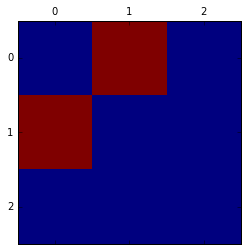

In [9]:
for row in grid:
    for c in row:
        c.update()
gridvalues=[[grid[y][x].value for x in range(columns)] for y in range(rows)]
MyFigure, MyAxes = plt.subplots()
MyAxes.matshow(gridvalues)
MyFigure.show()

In [10]:
print(grid[0][0], grid[0][1], grid[0][2],'\n',
grid[1][0], grid[1][1], grid[1][2],'\n',
grid[2][0], grid[2][1], grid[2][2])

0 1 0 
 1 0 0 
 0 0 0


In [ ]:
print(grid[0][0], )

In [ ]:
for row in grid:
    for c in row:
        c.update()
gridvalues=[[grid[y][x].value for x in range(columns)] for y in range(rows)]
MyFigure, MyAxes = plt.subplots()
MyAxes.matshow(gridvalues)
MyFigure.show()

In [ ]:
print(grid[0][0])

In [ ]:
MyFigure, MyAxes = plt.subplots()
MyAxes.matshow(gridvalues)
MyFigure.show()

In [ ]:
MyFigure, MyAxes = plt.subplots()
MyAxes.matshow(gridvalues)
MyFigure.show()